# Light gbm 특징
    - Gradient boosting 방식의 프레임 워크
	- Loss function 처럼 오차를 다시 train에 투입. gradient 이용 
      http://machinelearningkorea.com/2019/09/25/lightgbm%EC%9D%98-%ED%95%B5%EC%8B%AC%EC%9D%B4%ED%95%B4/
	- 나무를 수직 확장(leaf wise tree growth) : level wise 보다 낮은 loss
	- 트리 분기는 쪼갰을 때 각 힌트들이 이질적이어야. 타겟 구분하기 좋은 힌트.
    - 파라미터 설명 : https://greatjoy.tistory.com/72
    - row 만 개 이상이여야 과적합 방지, train : 약 45000개라서 괜찮  


In [12]:
import pandas as pd 
import numpy as np
train=pd.read_csv('train.csv')
test=pd.read_csv('test_x.csv') 

In [84]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
lgbm = LGBMClassifier(n_estimators=200)
params = {'max_depth': [10, 15, 20], 'min_child_samples': [20, 40, 60], 'subsample': [0.8, 1]}

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[train.columns.difference(['voted'])], train['voted'], test_size=0.2)

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_train, y_train), (X_test, y_test)])

print("최적 파라미터: ", grid.best_params_) #최적 파라미터:  {'max_depth': 10, 'min_child_samples': 40, 'subsample': 0.8} AUC: 0.7672
lgbm_roc_score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8, min_child_samples=40, max_depth=10, is_unbalance = True)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=True)

score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score))

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.759286	valid_0's binary_logloss: 0.66798	valid_1's auc: 0.750331	valid_1's binary_logloss: 0.668662
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.762024	valid_0's binary_logloss: 0.65078	valid_1's auc: 0.752824	valid_1's binary_logloss: 0.651746
[3]	valid_0's auc: 0.765785	valid_0's binary_logloss: 0.636532	valid_1's auc: 0.755962	valid_1's binary_logloss: 0.63789
[4]	valid_0's auc: 0.766668	valid_0's binary_logloss: 0.624529	valid_1's auc: 0.756693	valid_1's binary_logloss: 0.626091
[5]	valid_0's auc: 0.768041	valid_0's binary_logloss: 0.614508	valid_1's auc: 0.758089	valid_1's binary_logloss: 0.616485
[6]	valid_0's auc: 0.769153	valid_0's binary_logloss: 0.605879	valid_1's auc: 0.759189	valid_1's binary_logloss: 0.608099
[7]	valid_0's auc: 0.770435	valid_0's binary_logloss: 0.598585	valid_1's auc: 0.760627	valid_1's binary_log

In [91]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [93]:
import joblib
joblib.dump(lgbm,'lgbm.pkl')

['lgbm.pkl']

# gbc 모델 

In [35]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(train[train.columns.difference(['voted'])], train['voted'], test_size=0.2)
params = {'max_depth': [10, 15, 20],  'subsample': [0.8, 1]}

grid = GridSearchCV(gbc, param_grid=params)
grid.fit(X_train, y_train) #, eval_set=[(X_train, y_train), (X_test, y_test)])
print("최적 파라미터: ", grid.best_params_) 

# gbc = GradientBoostingClassifier(random_state=0, )
# gbc.fit(X_train, y_train)
# pred=clf.predict(X_test)
# gbc.score(X_test, y_test)
# print(roc_auc_score(pred, y_test))

# from sklearn.model_selection import cross_validate

# my_value = cross_validate(gbc, X, y, cv=10, scoring = myscore)
# print(np.mean(my_value['test_score'].tolist()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py", line 410, in fit
    dtype=DTYPE, multi_output=True)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py", line 802, in check_X_y
    estimator=estimator)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py", li

ValueError: could not convert string to float: 'Female'

In [36]:
import pandas as pd 
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test_x.csv',index_col=0)
def tp_score(train):
    train['diligence']=round((train['tp03']+ 8-train['tp08'])/2)
    train['Affinity']=round((train['tp07']+ 8-train['tp02'])/2)
    train['emotional stability']=round((train['tp09']+ 8-train['tp04'])/2)
    train['openness']=round((train['tp05']+ 8-train['tp10'])/2)
    train['extroversion']=round((train['tp01']+ 8-train['tp06'])/2)
    train.drop([ 'tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10'],axis=1,inplace=True)
    return train
train=tp_score(train)
test=tp_score(test)

train.age_group=train.age_group.apply(lambda x : int(x.replace('0s','')) )
test.age_group=test.age_group.apply(lambda x : int(x.replace('0s','')) )

train=train.drop(['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE'], axis=1)
test=test.drop(['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE'], axis=1)

train['race']=train.race.apply(lambda x : 1 if x=='White' else 0 ) 
train['hand']=train.hand.apply(lambda x : 1 if x==1 else 0 )
test['race']=test.race.apply(lambda x : 1 if x=='White' else 0 )
test['hand']=test.hand.apply(lambda x : 1 if x==1 else 0 )

train1=pd.concat([train[train.columns.difference(['gender', 'religion','voted'])] ,pd.get_dummies(train[['gender','religion']])],axis=1)
train1.drop(['gender_Male'],axis=1,inplace=True)
test=pd.concat([test[test.columns.difference(['gender', 'religion'])] ,pd.get_dummies(test[['gender','religion']])],axis=1)
test.drop(['gender_Male'],axis=1,inplace=True)

In [25]:
train['voted']=train['voted'].apply(lambda x: x-1)

## catboost 모델

In [26]:
from catboost import CatBoostClassifier,Pool
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
train_data=[]
for i in range(len(train)):
    train_data.append(train1.iloc[train.index==i,:].values[0].tolist())  
X_train = train_data[:35000]
y_train = train['voted'][:35000].tolist()
eval_data = train_data[35000:]

cat = CatBoostClassifier()
params = {'iterations': [100],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['AUC'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator=cat, param_grid=params, scoring=scorer, cv=5)
clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

KeyboardInterrupt: 

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4)
cat.fit(X_train, y_train)

preds_class = cat.predict(eval_data)
preds_proba = cat.predict_proba(eval_data)
preds_raw = cat.predict(eval_data, prediction_type='RawFormulaVal')
score = roc_auc_score(train['voted'][35000:], preds_proba[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score))

0:	learn: 0.6703956	total: 17.4ms	remaining: 1.72s
1:	learn: 0.6462099	total: 31.4ms	remaining: 1.54s
2:	learn: 0.6340671	total: 45.9ms	remaining: 1.48s
3:	learn: 0.6228427	total: 59.1ms	remaining: 1.42s
4:	learn: 0.6105206	total: 73.2ms	remaining: 1.39s
5:	learn: 0.6042731	total: 87ms	remaining: 1.36s
6:	learn: 0.5992601	total: 101ms	remaining: 1.34s
7:	learn: 0.5929771	total: 115ms	remaining: 1.32s
8:	learn: 0.5887982	total: 128ms	remaining: 1.29s
9:	learn: 0.5848781	total: 142ms	remaining: 1.27s
10:	learn: 0.5826642	total: 155ms	remaining: 1.25s
11:	learn: 0.5810434	total: 169ms	remaining: 1.24s
12:	learn: 0.5788266	total: 182ms	remaining: 1.22s
13:	learn: 0.5776172	total: 195ms	remaining: 1.2s
14:	learn: 0.5759707	total: 209ms	remaining: 1.18s
15:	learn: 0.5745722	total: 222ms	remaining: 1.17s
16:	learn: 0.5732913	total: 237ms	remaining: 1.16s
17:	learn: 0.5727663	total: 250ms	remaining: 1.14s
18:	learn: 0.5722667	total: 264ms	remaining: 1.13s
19:	learn: 0.5718445	total: 277ms	rema

In [28]:
preds_class = cat.predict(test)

In [29]:
pd.Series(preds_class).value_counts()

0    5976
1    5407
dtype: int64

In [15]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# Ensemble 모델

In [30]:
classifiers={}
import joblib
model = joblib.load('lgbm.pkl') 
classifiers1=model
classifiers2=cat

from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import  VotingClassifier
eclf = VotingClassifier(estimators=[('lgbm', classifiers1), ('catboost', classifiers2)],voting='soft',weights=[4,3])
eclf = eclf.fit(X_train,y_train)
predictions=eclf.predict(X_test) 

accuracy=100.0*accuracy_score(train['voted'][35000:],predictions)  
print(accuracy)

0:	learn: 0.6703956	total: 19.4ms	remaining: 1.92s
1:	learn: 0.6462099	total: 33.2ms	remaining: 1.63s
2:	learn: 0.6340671	total: 47.5ms	remaining: 1.54s
3:	learn: 0.6228427	total: 61.1ms	remaining: 1.47s
4:	learn: 0.6105206	total: 79.1ms	remaining: 1.5s
5:	learn: 0.6042731	total: 92.9ms	remaining: 1.46s
6:	learn: 0.5992601	total: 107ms	remaining: 1.43s
7:	learn: 0.5929771	total: 122ms	remaining: 1.4s
8:	learn: 0.5887982	total: 136ms	remaining: 1.37s
9:	learn: 0.5848781	total: 150ms	remaining: 1.35s
10:	learn: 0.5826642	total: 164ms	remaining: 1.33s
11:	learn: 0.5810434	total: 178ms	remaining: 1.31s
12:	learn: 0.5788266	total: 192ms	remaining: 1.28s
13:	learn: 0.5776172	total: 205ms	remaining: 1.26s
14:	learn: 0.5759707	total: 219ms	remaining: 1.24s
15:	learn: 0.5745722	total: 233ms	remaining: 1.22s
16:	learn: 0.5732913	total: 247ms	remaining: 1.21s
17:	learn: 0.5727663	total: 260ms	remaining: 1.18s
18:	learn: 0.5722667	total: 273ms	remaining: 1.17s
19:	learn: 0.5718445	total: 286ms	rem

NameError: name 'X_test' is not defined

In [31]:
predictions=eclf.predict(eval_data) 

accuracy=100.0*accuracy_score(train['voted'][35000:],predictions)  
print(accuracy)

68.47702240789974


In [34]:
submission=pd.DataFrame(data={'voted':pd.Series(eclf.predict(test))})
submission['voted']=submission['voted'].apply(lambda x: x+1)
submission.reset_index(inplace=True)
submission.to_csv('submission/submission47.csv',index=False)

In [196]:
racy

,race,voted,QaA
0,Arab+InAus+White,1,15882
1,Arab+InAus+White,2,15770
2,Asian,1,2019
3,Asian,2,4815
4,Black,1,872
5,Black,2,1296
6,Native American,1,226
7,Native American,2,322
8,Other,1,1635
9,Other,2,2695


In [193]:
racy=racy.groupby(['race','voted']).sum()['QaA']

In [191]:
racy.loc[racy['race'].isin(['Arab','White','Indigenous Australian']),'race']='Arab+InAus+White'

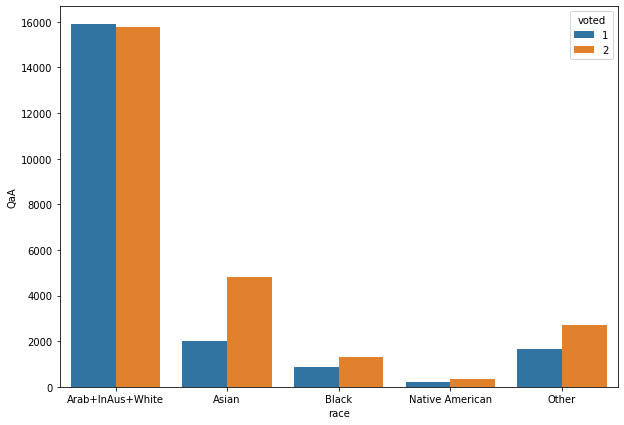

In [197]:
plt.figure(figsize=(10,7))
sns.barplot(x='race', y='QaA', hue='voted', data=racy) # stacked bar chart
plt.show()

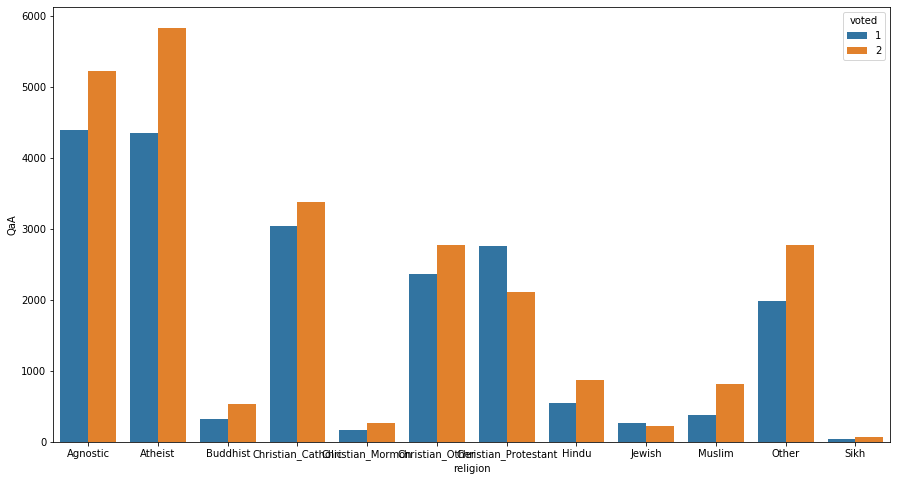

In [119]:
plt.figure(figsize=(15,8))
sns.barplot(x='religion', y='QaA', hue='voted', data=reli_voted) # stacked bar chart
plt.show()

In [40]:
train[['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'urban', 'voted', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
       'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'diligence',
       'Affinity', 'emotional stability', 'openness', 'extroversion']].head(60)

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,...,wr_09,wr_10,wr_11,wr_12,wr_13,diligence,Affinity,emotional stability,openness,extroversion
index,,,,,,,,,,,,,,,,,,,,,
0,30s,2,1,4,Female,1,3,White,Other,1,...,0,1,0,1,1,3.0,6.5,5.5,3.5,4.5
1,20s,4,2,3,Female,1,1,Asian,Hindu,3,...,0,1,0,1,1,2.0,5.0,4.0,2.5,3.5
2,30s,3,1,3,Male,1,2,White,Other,2,...,1,1,0,1,1,1.5,3.5,2.0,4.0,3.0
3,20s,4,2,0,Female,1,1,Asian,Hindu,3,...,0,1,0,1,1,3.0,2.5,4.0,3.0,3.5
4,20s,3,1,2,Male,1,2,White,Agnostic,1,...,0,1,1,1,1,1.5,3.5,2.0,1.0,3.5
5,40s,2,1,6,Female,1,3,White,Other,2,...,0,0,0,0,0,3.0,3.0,4.5,5.0,5.0
6,20s,2,1,3,Male,1,1,White,Atheist,2,...,0,1,0,1,1,4.5,3.5,2.0,2.0,4.5
7,30s,2,1,1,Male,1,1,White,Christian_Other,2,...,1,1,0,1,1,3.5,1.0,5.0,1.0,5.5
8,20s,4,2,0,Female,2,1,Other,Christian_Other,1,...,0,0,0,1,1,4.0,4.5,4.5,3.5,3.5


In [37]:
def tp_score(train):
    train['diligence']=(train['tp03']+ 8-train['tp08'])/2
    train['Affinity']=(train['tp07']+ 8-train['tp02'])/2
    train['emotional stability']=(train['tp09']+ 8-train['tp04'])/2
    train['openness']=(train['tp05']+ 8-train['tp10'])/2
    train['extroversion']=(train['tp01']+ 8-train['tp06'])/2
    train.drop([ 'tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10'],axis=1,inplace=True)
    return train
train=tp_score(train)
test=tp_score(test)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train1=pd.concat([train[train.columns.difference(['gender', 'age_group', 'race', 'religion','voted'])] ,pd.get_dummies(train[['gender', 'age_group', 'race', 'religion']])],axis=1)
X=train1 #(45532, 100) w/o voted
scaler.fit(X)
X=scaler.transform(X)
train=pd.concat([pd.DataFrame(X),train['voted']],axis=1)

test=pd.concat([test[test.columns.difference(['gender', 'age_group', 'race', 'religion'])] ,pd.get_dummies(test[['gender', 'age_group', 'race', 'religion']])],axis=1)
test=scaler.transform(test)

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(train.loc[0,:].values.reshape(-1, 1),train.loc[1,:].values.reshape(-1, 1))

array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.]])

In [2]:
import string 
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [3]:
[print("\'"+'Q%sE'%(string.ascii_lowercase[i])+"\',") for i in range(20)]

'QaE',
'QbE',
'QcE',
'QdE',
'QeE',
'QfE',
'QgE',
'QhE',
'QiE',
'QjE',
'QkE',
'QlE',
'QmE',
'QnE',
'QoE',
'QpE',
'QqE',
'QrE',
'QsE',
'QtE',


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

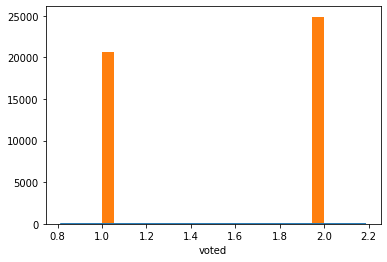

<Figure size 432x288 with 0 Axes>

In [42]:
train['race']
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

mu = train['voted'].values.mean()
sigma = train['voted'].values.std()
num_bins = 20


sns.distplot(train['voted'])
_ = plt.hist(train['voted'].values, bins='auto') 
plt.show()
plt.subplots_adjust(left=0.15)
plt.show()

In [108]:
[print("sns.distplot(train[train.race == '%s']['voted'],label='%s')"%(i,i)) for i in list(train.race.value_counts().index)]

sns.distplot(train[train.race == 'White']['voted'],label='White')
sns.distplot(train[train.race == 'Asian']['voted'],label='Asian')
sns.distplot(train[train.race == 'Other']['voted'],label='Other')
sns.distplot(train[train.race == 'Black']['voted'],label='Black')
sns.distplot(train[train.race == 'Native American']['voted'],label='Native American')
sns.distplot(train[train.race == 'Arab']['voted'],label='Arab')
sns.distplot(train[train.race == 'Indigenous Australian']['voted'],label='Indigenous Australian')


[None, None, None, None, None, None, None]

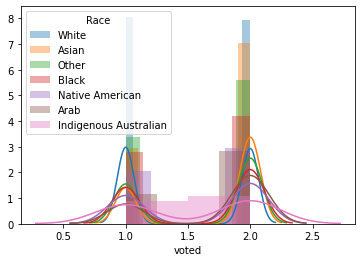

In [107]:
sns.distplot(train[train.race == 'White']['voted'],label='White')
sns.distplot(train[train.race == 'Asian']['voted'],label='Asian')
sns.distplot(train[train.race == 'Other']['voted'],label='Other')
sns.distplot(train[train.race == 'Black']['voted'],label='Black')
sns.distplot(train[train.race == 'Native American']['voted'],label='Native American')
sns.distplot(train[train.race == 'Arab']['voted'],label='Arab')
sns.distplot(train[train.race == 'Indigenous Australian']['voted'],label='Indigenous Australian')
plt.legend(title="Race")
plt.show()

In [64]:
sns.distplot(train[train.race == 'White']["voted"],  color="blue", label="White")
sns.distplot(train[train.race == 'Asian']["voted"],  color="white", label="Asian")
sns.distplot(train[train.race == 'Black']["voted"],  color="red", label="Black")
sns.distplot(train[train.race == 'White']["voted"],  color="blue", label="White")

plt.legend(title="Race")
plt.show()

TypeError: 'set' object is not subscriptable

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=pd.concat([train[train.columns.difference(['gender', 'age_group', 'race', 'religion','voted'])] ,pd.get_dummies(train[['gender', 'age_group', 'race', 'religion']])],axis=1)
scaler.fit(X_train) #(45532, 100) voted 빼고
X_train=scaler.transform(X_train)

y_train = np.array(train['voted']).reshape(-1,1)
scaler.fit(y_train) 
y_train=scaler.transform(y_train)

test=pd.concat([test[test.columns.difference(['gender', 'age_group', 'race', 'religion'])] ,pd.get_dummies(test[['gender', 'age_group', 'race', 'religion']])],axis=1)
test=scaler.transform(test)

In [ ]:
boosted_dt = ensemble_model(blended, method = 'Boosting', n_estimators = 100)

In [37]:
lgb.predict(test)
submission=pd.DataFrame(data={'voted':lgb.predict(test)})
submission.reset_index(inplace=True)
submission.to_csv('submission7.csv',index=False)

In [16]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='binary',num_leaves=5,learning_rate=0.1, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

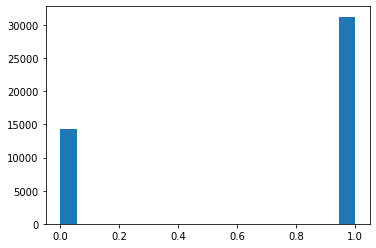

In [51]:
train['race']=train.race.apply(lambda x : 1 if x=='White' else 0 )
## race 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 

# sns.distplot(pd.Series(tup)*0.001)
_ = plt.hist(train.race.values, bins='auto') 

plt.subplots_adjust(left=0.15)
plt.show()